Zad 1.
Wygeneruj dane z rozkładu normalnego o średniej m = [0, 0] i kowariancji cov = [[1, 0], [0, 1]].
Narysuj na jednym wykresie dane oraz gęstość rozkładu normalnego (kontury) o parametrach m = [1, 0] oraz cov = [[1, 0], [0, 2]]. 

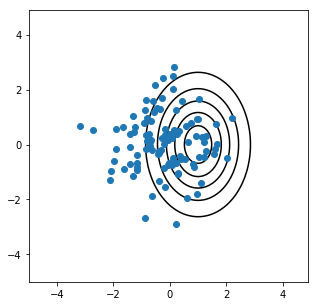

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import multivariate_normal
mean1 = [0, 0]
cov1 = [[1, 0], [0, 1]] 
rv1 = multivariate_normal(mean1, cov1)

mean2 = [1, 0]
cov2 = [[1, 0], [0, 2]] 
rv2 = multivariate_normal(mean2, cov2)

data=rv1.rvs(100)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

ax.plot(data[:,0],data[:,1],"o")

x, y = np.mgrid[-5:5:.1, -5:5:.1]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
ax.contour(x, y, rv2.pdf(pos), 6, colors = 'k')
plt.show()

Zad 2.
Zminimalizuj zlogarytmowaną funkcję wiarygodności dla rodziny rozkładów Split Normal Distribution link oraz klasycznych rozkładów normalnych. Narysuj na jednym wykresie dane oraz gęstość (kontury).
Użyj

    danych z rozkładu jednostajnego na odcinku [-1,1] x [-1,1].
    danych z rozkładu normalnego o średniej m = [0, 0] i kowariancji cov = [[1, 0], [0, 1]].
    danych z pliku link


In [2]:
from scipy.optimize import fmin
import math
import random
import matplotlib.mlab as mlab

N = 100000
data1 = np.random.uniform(-1, 1, (N, 2))

m = [0, 0]
cov = [[1, 0], [0, 1]] 
rv = multivariate_normal(mean, cov)
data2 = rv.rvs(N)

data3 = np.loadtxt("data.txt", delimiter = ' ')


def GSN(x, m, W, s, t):
    det = numpy.linalg.det(W)
    N = len()
    summ = 0
    for i in range(N):
        summ += SN(x, m, s, t)
    return summ

def SN(x, m, s, t):
    c=math.sqrt(2./math.pi)*(1./s)*(1./(1+t))
    if x<=m:
        return (c*math.exp(-1./(2* s**2) * (x-m)**2))
    else:
        return (c*math.exp(-1./(t**2 * s**2) * (x-m)**2))
    

max_func = 0
min_func = 0
maximal_x, maximal_y = None, None
minimal_x, minimal_y = None, None

for i in range(100):
    randx = random.random()*2 - 1
    randy = random.random()*2 - 1
    result = loglike(X, randx, randy)
    max_func = max(max_func, result)
    if max_func == result:
        maximal_x, maximal_y = randx, randy
    min_func = min(min_func, result)
    if min_func == result:
        minimal_x, minimal_y = randx, randy

num_bins = 50

gauss = np.random.normal(minimal_x, minimal_y, N)
for i in range(N):
    gauss[i] = np.log(gauss[i])
        
n, bins, patches = plt.hist(X, num_bins, normed=1, facecolor='green', alpha=0.5)
y = mlab.normpdf(bins, minimal_x, minimal_y)
plt.plot(bins, y, 'r--')
plt.show() 



max_func = 0
min_func = 0
maximal_x, maximal_y = None, None
minimal_x, minimal_y = None, None

for i in range(100):
    randx = random.random()*2 - 1
    randy = random.random()*2 - 1
    result = loglike(X, randx, randy)
    max_func = max(max_func, result)
    if max_func == result:
        maximal_x, maximal_y = randx, randy
    min_func = min(min_func, result)
    if min_func == result:
        minimal_x, minimal_y = randx, randy

num_bins = 50

gauss = np.random.normal(minimal_x, minimal_y, N)
for i in range(N):
    gauss[i] = np.log(gauss[i])
        
n, bins, patches = plt.hist(X, num_bins, normed=1, facecolor='green', alpha=0.5)
y = mlab.normpdf(bins, minimal_x, minimal_y)
plt.plot(bins, y, 'r--')
plt.show() 

data = np.loadtxt("data2.txt", delimiter = ' ')

max_func = 0
min_func = 0
maximal_x, maximal_y = None, None
minimal_x, minimal_y = None, None

for i in range(100):
    randx = random.random()*2 - 1
    randy = random.random()*2 - 1
    result = loglike(X, randx, randy)
    max_func = max(max_func, result)
    if max_func == result:
        maximal_x, maximal_y = randx, randy
    min_func = min(min_func, result)
    if min_func == result:
        minimal_x, minimal_y = randx, randy

num_bins = 50

gauss = np.random.normal(minimal_x, minimal_y, N)
for i in range(N):
    gauss[i] = np.log(gauss[i])
        
n, bins, patches = plt.hist(X, num_bins, normed=1, facecolor='green', alpha=0.5)
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.show() 

NameError: name 'mean' is not defined

Zad 4.
Napisz algorytm k-mean w wersji Lloyd (klasyczny). Nie można używać żadnych funkcji z k-means w pythonie. 

In [ ]:
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from timeit import itertools


def KMeans (data, K, dim): 
    X = data[:,[range(0,dim)]]  
    C = data[:K,[range(0,dim)]] 
    C_last = np.zeros((K, dim))
    
    while (C != C_last).all():
        C_last = np.copy(C)  
        D = np.zeros((K,X.shape[0])) 
        Dmin = np.zeros((K,X.shape[0]))
        
        for i in range(0,K):            
            for j in range(0,X.shape[0]):
                D[i,j] = distance.euclidean(C[i], X[j])          
        for k in range(0,D.shape[1]):
            Dmin[np.argmin(D[:,k]),k]=1
        
        for i in range(0,K):
            sum = np.zeros((1, dim))
            inc = 0
            for j in range(0,Dmin.shape[1]):
                if(Dmin[i,j]==1):
                    sum += X[j]
                    inc+=1
            C[i] = sum/inc
    return C ,Dmin   

    
data = np.loadtxt("iris.data",delimiter = ',',usecols=range(0,4))
labels = np.loadtxt("iris.data",dtype = np.str, delimiter = ',',usecols=(4,))

K=3
dim = 2
C , dist = KMeans(data,K,dim)

X = data[:,[range(0,dim)]] 
colors = itertools.cycle(["r", "b", "g"])
for row in range(0,dist.shape[0]):
    pointsX = []
    pointsY = []
    for col in range(0,dist.shape[1]):
        if(dist[row,col]==1):
            pointsX.append(data[col,0])
            pointsY.append(data[col,1])
    plt.scatter(pointsX, pointsY,color=next(colors))
red_patch = mpatches.Patch(color='red', label='Iris-virginica')
blue_patch = mpatches.Patch(color='blue', label='Iris-versicolor')
green_patch = mpatches.Patch(color='green', label='Iris-setosa')
plt.legend(handles=[red_patch,blue_patch,green_patch]) 
plt.show()